<a href="https://colab.research.google.com/github/nkmin0/2024_RL/blob/main/RL_240405_Q-Learning/QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium[classic-control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.9 MB/s eta 0:00:00


In [3]:
import gymnasium as gym
import random

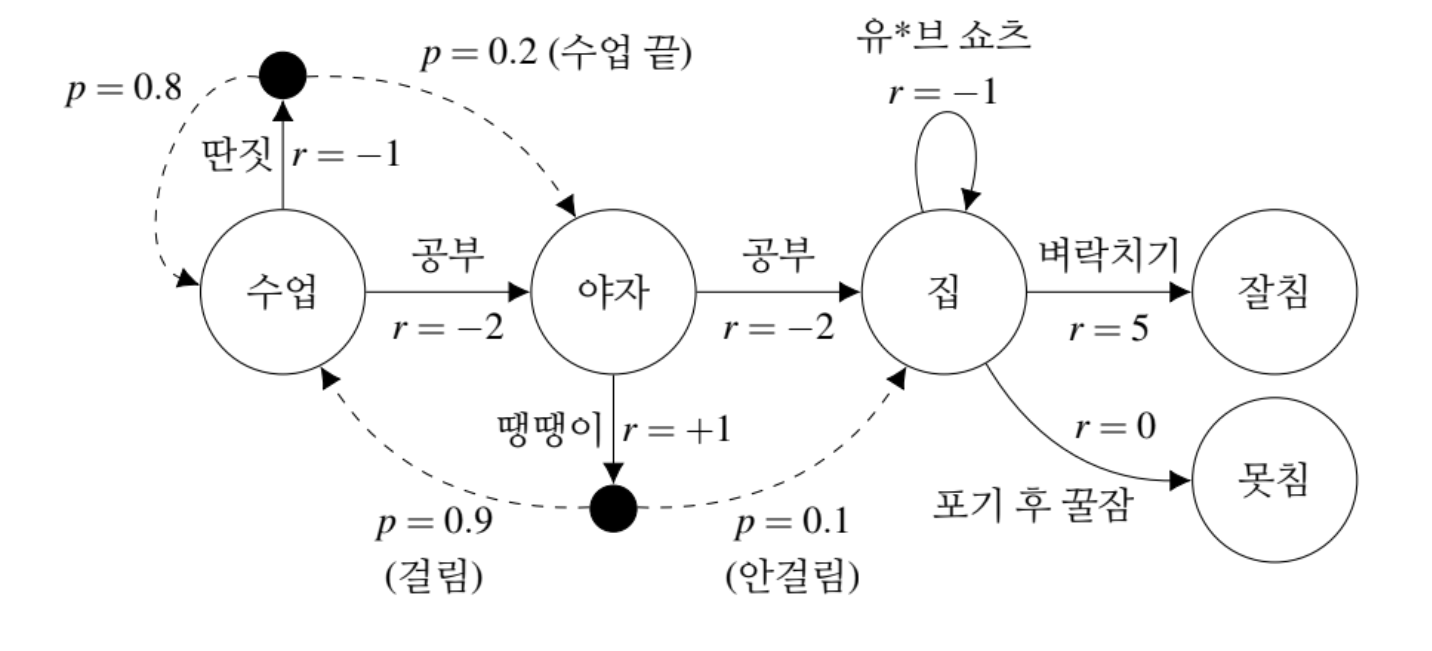

In [44]:
class MyEnv(gym.Env): #환경
    def __init__(self):
        self.observation_space = gym.spaces.Discrete(4, start=0)
        # 0 : 수업
        # 1 : 야자
        # 2 : 집
        # 3 : 시험

        self.action_space = gym.spaces.Discrete(3)


    def reset(self):
        state = 0
        return state

    def step(self, state, action):
        q=random.random()
        next_state = state
        reward = 0
        done = False

        if state == 0: # 수업
            if action == 0: # 땡땡이
                if q<0.2:
                    next_state = state + 1
                reward = -1
            else: # 공부
                next_state = state + 1
                reward = -2

        elif state == 1: # 야자
            if action == 0: # 딴짓
                if q<0.9:
                    next_state = state - 1
                else:
                    next_state = state + 1
                reward = 1
            else: # 공부
                next_state = state + 1
                reward = -2

        elif state == 2: # 집
            if action == 0: # 유튜브
                reward = -1
            elif action == 1: # 벼락치기
                reward = 5
                next_state = state + 1
            else: # 잠
                next_state = state + 1

        elif state == 3: # 시험 결과 나옴
            done=True

        else:
            done=True
            #print("error")

        return next_state, reward, done, {}



In [48]:
import gym
import random

class Mypolicy():
    def __init__(self, env):
        self.env = env
        self.learning_rate = 0.1 # 학습률
        self.discount_factor = 0.9 # 할인율
        self.exploration_rate = 1.0 # 탐험 확률
        self.exploration_decay = 0.99 # 탐험 확률 조정
        self.min_exploration_rate = 0.01 # 최소 탐험 확률
        self.Q = {}

        self.state = self.env.reset()

    def choose_action(self):
        if random.uniform(0, 1) < self.exploration_rate * 0.5:  # 탐험 확률 높임
            return self.env.action_space.sample()  # 탐험
        else:
            if self.state in self.Q:
                return max(self.Q[self.state], key=self.Q[self.state].get)  # 그리디
            else:
                return self.env.action_space.sample()  # 경험하지 않은 상태라면 탐험

    def update_Q(self, state, action, next_state, reward):
        current_q_value = self.Q.get((state, action), 0)
        max_future_q_value = max(self.Q.get((next_state, a), 0) for a in range(self.env.action_space.n))
        # 가장 가치가 높은 것을 찾음
        new_q_value = (1 - self.learning_rate) * current_q_value + self.learning_rate * (reward + self.discount_factor * max_future_q_value)
        # 값 업데이트

        self.Q[(state, action)] = new_q_value

    def train(self, training_steps=500000):
        for i in range(training_steps):
            self.state = self.env.reset()
            done = False
            total_reward = 0

            while not done:
                action = self.choose_action()
                next_state, reward, done, _ = self.env.step(self.state, action)
                total_reward += reward

                self.update_Q(self.state, action, next_state, reward)

                self.state = next_state

                if self.state == -1:
                    print("err")

            # 학습률 업데이트
            self.exploration_rate = max(self.min_exploration_rate, self.exploration_rate * self.exploration_decay)

            if i%50000 == 0:
                print("i:", i, "Total Reward:", total_reward)

        print("Training finished.")

    def test(self):
        self.state = self.env.reset()
        done = False
        total_reward = 0

        while not done:
            action = self.choose_action()
            print(self.state,action)
            next_state, reward, done, _ = self.env.step(self.state, action)
            total_reward += reward
            self.state = next_state

        print("Test Total Reward:", total_reward)

# 환경 생성
env = MyEnv()

agent = Mypolicy(env)
agent.train()

agent.test()


i: 0 Total Reward: -4
i: 50000 Total Reward: -6
i: 100000 Total Reward: -6
i: 150000 Total Reward: 1
i: 200000 Total Reward: 2
i: 250000 Total Reward: -6
i: 300000 Total Reward: -5
i: 350000 Total Reward: -4
i: 400000 Total Reward: -2
i: 450000 Total Reward: -1
Training finished.
0 0
0 1
1 2
2 1
3 2
Test Total Reward: 0
